In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, RocCurveDisplay

## Data Preprocessing and Splitting

In [2]:
df = pd.read_csv("train_ready_churn_dataset.csv")

In [3]:
df.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False


In [4]:
# converts all the boolean values to 0 and 1
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

In [5]:
df.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [6]:
# identifying target variable and predictor variables
X = df.drop('Churn', axis=1)
y = df['Churn']

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# standardizing 'MonthlyCharges' and 'TotalCharges' column
convert_cols = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X[convert_cols] = scaler.fit_transform(X[convert_cols])

In [9]:
X.sample(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
4943,1,0.648248,0.032846,0,1,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1917,0,-0.147860,-0.387650,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4971,0,-1.341192,-0.395944,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
# data splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures the same proportion of Churn and Non-Churn in train set and test set

In [11]:
print("Data Preprocessing Complete.\n")
print(f"Training set shape of X : {X_train.shape}")
print(f"Training set shape of y : {y_train.shape}")
print(f"Testing set shape of X  : {X_test.shape}")
print(f"Testing set shape of y  : {y_test.shape}")

Data Preprocessing Complete.

Training set shape of X : (5625, 50)
Training set shape of y : (5625,)
Testing set shape of X  : (1407, 50)
Testing set shape of y  : (1407,)


## SMOTE Initialization

In [12]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import json

## Decision Tree Model Training

In [13]:
# initialize smote
smote = SMOTE(random_state=42)

In [14]:
# smote on training dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# train the dt model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
# evaluation of the dt model
y_pred_dt = dt_model.predict(X_test)

y_proba_dt = dt_model.predict_proba(X_test)[:, 1]  
roc_auc_dt = roc_auc_score(y_test, y_proba_dt) # auc calculation

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
dt_model_acc = dt_model.score(X_test,y_test)


print("\n--- Decision Tree Model (Non Tuned) ---")
print(f'Accuracy: {dt_model_acc:.4f}')
print(f'ROC AUC Score: {roc_auc_dt:.4f}')
print("\nConfusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", report_dt)


--- Decision Tree Model (Non Tuned) ---
Accuracy: 0.7143
ROC AUC Score: 0.6715

Confusion Matrix:
 [[788 245]
 [157 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80      1033
           1       0.47      0.58      0.52       374

    accuracy                           0.71      1407
   macro avg       0.65      0.67      0.66      1407
weighted avg       0.74      0.71      0.72      1407



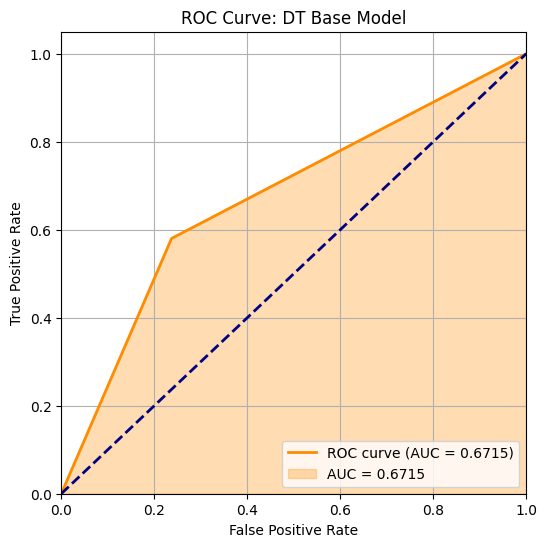

In [16]:
# ROC-AUC curve for DT base model
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.4f})')
plt.fill_between(fpr, tpr, color='darkorange', alpha=0.3, label=f'AUC = {roc_auc_dt:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: DT Base Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [63]:
# writing classifiaction report of dt based model to json
dt_report_dict = classification_report(y_test, y_pred_dt, output_dict=True)
with open('Smote_dt_C-Report.json','w') as f:
    json.dump(dt_report_dict, f, indent=4)

### Decion Tree Model Training with Hyperparameter Tuning

In [20]:
# applying smote on DTC
pipeline_dt = Pipeline([
    ('smote', smote),
    ('dt', DecisionTreeClassifier(random_state=42))
])

In [21]:
# define the parameter grid
param_grid_dt = {
    'dt__max_depth': [3, 5, 7, 10],
    'dt__min_samples_leaf': [5, 10],
    'dt__criterion': ['gini', 'entropy']
}

In [22]:
# initialize and train GridSearchCV
grid_search_dt = GridSearchCV(estimator=pipeline_dt,
                            param_grid=param_grid_dt,
                            scoring='f1',
                            cv=5,
                            n_jobs=4,
                            verbose=1)

In [23]:
# fit trainsets to GridsearchCV
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'dt__criterion': ['gini', 'entropy'], 'dt__max_depth': [3, 5, ...], 'dt__min_samples_leaf': [5, 10]}"
,scoring,'f1'
,n_jobs,4
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,'auto'


In [24]:
# evaluation of the tuned model
best_dt_tuned = grid_search_dt.best_estimator_
y_pred_tuned_dt = best_dt_tuned.predict(X_test)

y_proba_tuned_dt = best_dt_tuned.predict_proba(X_test)[:, 1]
roc_auc_tuned_dt = roc_auc_score(y_test, y_proba_tuned_dt)

conf_matrix_tuned_dt = confusion_matrix(y_test, y_pred_tuned_dt)
report_tuned_dt = classification_report(y_test, y_pred_tuned_dt)
tuned_dt_acc = best_dt_tuned.score(X_test,y_test)

print("--- Decision Tree Model (Tuned) ---")
print(f"Best Parameters: {grid_search_dt.best_params_}")
print(f'Accuracy: {tuned_dt_acc:.4f}')
print(f'ROC AUC Score: {roc_auc_tuned_dt:.4f}')
print("\nConfusion Matrix:\n", conf_matrix_tuned_dt)
print("\nClassification Report:\n", report_tuned_dt)

--- Decision Tree Model (Tuned) ---
Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_leaf': 5}
Accuracy: 0.7491
ROC AUC Score: 0.8073

Confusion Matrix:
 [[782 251]
 [102 272]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1033
           1       0.52      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



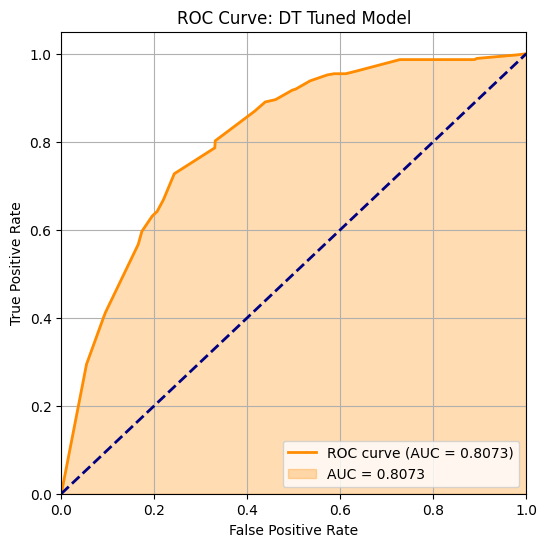

In [25]:
# ROC-AUC curve for DT tuned model
fpr, tpr, _ = roc_curve(y_test, y_proba_tuned_dt)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_tuned_dt:.4f})')
plt.fill_between(fpr, tpr, color='darkorange', alpha=0.3, label=f'AUC = {roc_auc_tuned_dt:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: DT Tuned Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [66]:
# writing classifiaction report of dt tuned model to json
dt_tuned_report_dict = classification_report(y_test, y_pred_tuned_dt, output_dict=True)
with open('Smote_tuned_dt_C-Report.json','w') as f:
    json.dump(dt_tuned_report_dict, f, indent=4)

## Neural Network-base Model Training

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [30]:
# normalize data for NN training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
import warnings
import os

warnings.filterwarnings("ignore")

In [32]:
# apply smote to the scaled training data 
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

nn_baseline = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

nn_baseline.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [33]:
# train the NN model
history_baseline = nn_baseline.fit(X_resampled, y_resampled,
                                   epochs=50,
                                   batch_size=32,
                                   verbose=0)

In [34]:
# evaluation the NN Model
loss_baseline, accuracy_baseline_nn = nn_baseline.evaluate(X_test_scaled, y_test, verbose=0)

y_proba_baseline_nn = nn_baseline.predict(X_test_scaled).flatten()
y_pred_baseline_nn = (nn_baseline.predict(X_test_scaled) > 0.5).astype("int32")

roc_auc_baseline_nn = roc_auc_score(y_test, y_proba_baseline_nn)

print("\n--- Neural Network Model (Non Tuned) ---")
print(f"Accuracy: {accuracy_baseline_nn:.4f}")
print(f'ROC AUC Score: {roc_auc_baseline_nn:.4f}')
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline_nn))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

--- Neural Network Model (Non Tuned) ---
Accuracy: 0.7534
ROC AUC Score: 0.8091

Confusion Matrix:
 [[818 215]
 [132 242]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83      1033
           1       0.53      0.65      0.58       374

    accuracy                           0.75      1407
   macro avg       0.70      0.72      0.70      1407
weighted avg       0.77      0.75      0.76      1407



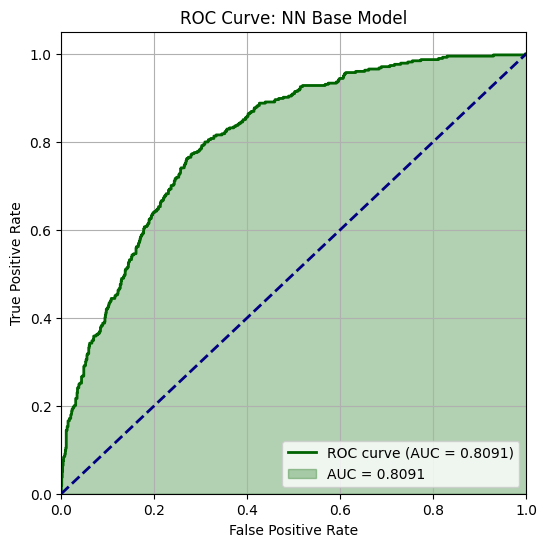

In [35]:
# ROC-AUC curve for NN base model
fpr, tpr, _ = roc_curve(y_test, y_proba_baseline_nn)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_baseline_nn:.4f})')
plt.fill_between(fpr, tpr, color='darkgreen', alpha=0.3, label=f'AUC = {roc_auc_baseline_nn:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: NN Base Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [69]:
# writing classifiaction report of base nn model to json
nn_report_dict = classification_report(y_test, y_pred_baseline_nn, output_dict=True)
with open('Smote_nn_C-Report.json', 'w') as f:
    json.dump(nn_report_dict, f, indent=4)

### Neural Network-base Model Training with Hyperparameter Tuning

In [39]:
# define model builder function for KerasTuner
def build_model(hp):
    
    # tuning 1 to 3 hidden layers
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train_scaled.shape[1],)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            # tuning each unit per layer
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
        # tune the dropout rate
        model.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

    # output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'precision'])
    return model

In [40]:
# initializing the tuner (RandomSearch)
tuner = kt.RandomSearch(
    build_model,
    objective='val_precision',
    max_trials=10, # Number of models to test
    executions_per_trial=1,
    directory='nn_tuning',
    project_name='churn_prediction'
)

Reloading Tuner from nn_tuning\churn_prediction\tuner0.json


In [41]:
# hyperparameter search
tuner.search(X_resampled, y_resampled,
             epochs=20,
             validation_split=0.2,
             verbose=1)

In [42]:
# best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_nn_tuned = tuner.hypermodel.build(best_hps)

In [43]:
# train the best model on the full resampled dataset
history_tuned = best_nn_tuned.fit(X_resampled, y_resampled,
                                  epochs=50, # Final training epochs
                                  batch_size=32,
                                  verbose=1)

Epoch 1/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6958 - loss: 0.5830 - precision: 0.7075
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7671 - loss: 0.5023 - precision: 0.7575
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7720 - loss: 0.4919 - precision: 0.7610
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7772 - loss: 0.4800 - precision: 0.7644
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7785 - loss: 0.4737 - precision: 0.7640
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7839 - loss: 0.4705 - precision: 0.7697
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7880 - loss: 0.4604 - precision: 0.7738
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7889 - loss: 0.4549 - precision: 0.7745
Epoch 9/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7891 - loss: 0.4571 - precision: 0.7758
Epoch 10/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5m

In [44]:
# evaluation the tuned model
loss_tuned, accuracy_tuned_nn, precision_tuned_nn = best_nn_tuned.evaluate(X_test_scaled, y_test, verbose=1) 

y_proba_tuned_nn = best_nn_tuned.predict(X_test_scaled).flatten()
y_pred_tuned_nn = (best_nn_tuned.predict(X_test_scaled) > 0.5).astype("int32")

roc_auc_tuned_nn = roc_auc_score(y_test, y_proba_tuned_nn)

print("--- Neural Network Model (Tuned) ---")
print("Best Hyperparameters:", best_hps.values)
print(f"Test Accuracy: {accuracy_tuned_nn:.4f}")
print(f'ROC AUC Score: {roc_auc_tuned_nn:.4f}')
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned_nn))

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7292 - loss: 0.5336 - precision: 0.4943
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
--- Neural Network Model (Tuned) ---
Best Hyperparameters: {'num_layers': 3, 'units_0': 160, 'dropout_0': 0.2, 'learning_rate': 0.0001, 'units_1': 128, 'dropout_1': 0.5, 'units_2': 448, 'dropout_2': 0.4}
Test Accuracy: 0.7292
ROC AUC Score: 0.8202

Confusion Matrix:
 [[724 309]
 [ 72 302]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



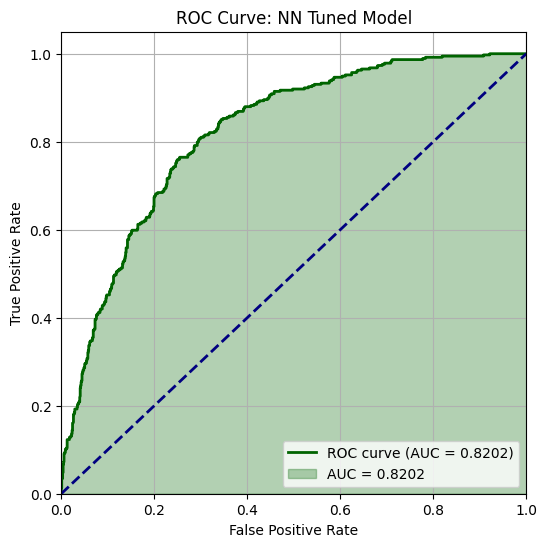

In [45]:
# ROC-AUC curve for NN tuned model
fpr, tpr, _ = roc_curve(y_test, y_proba_tuned_nn)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc_tuned_nn:.4f})')
plt.fill_between(fpr, tpr, color='darkgreen', alpha=0.3, label=f'AUC = {roc_auc_tuned_nn:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: NN Tuned Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [73]:
# writing classifiaction report of nn tuned model to json
nn_tuned_report_dict = classification_report(y_test, y_pred_tuned_nn, output_dict=True)
with open('Smote_tuned_nn_C-Report.json', 'w') as f:
    json.dump(nn_tuned_report_dict, f, indent=4)

## Confusion Matrix Visual Representation

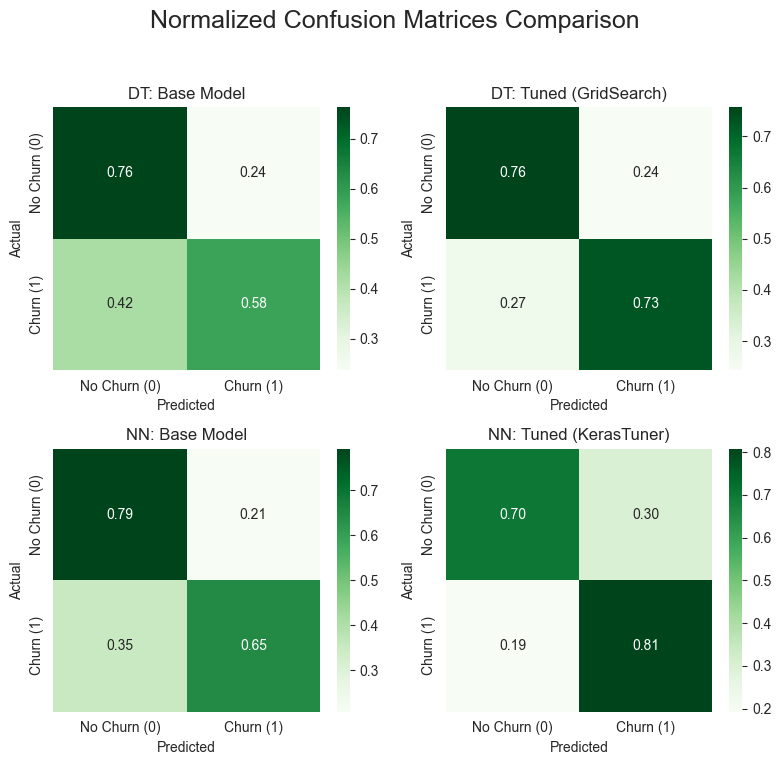

In [95]:
def cm_graph(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Greens', ax=ax,
                xticklabels=['No Churn (0)', 'Churn (1)'], 
                yticklabels=['No Churn (0)', 'Churn (1)']) 
    
    ax.set_title(title)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')


fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Normalized Confusion Matrices Comparison', fontsize=18)
sns.set_style("whitegrid")

cm_graph(y_test, y_pred_dt, "DT: Base Model", axes[0, 0])
cm_graph(y_test, y_pred_tuned_dt, "DT: Tuned (GridSearch)", axes[0, 1])
cm_graph(y_test, y_pred_baseline_nn, "NN: Base Model", axes[1, 0])
cm_graph(y_test, y_pred_tuned_nn, "NN: Tuned (KerasTuner)", axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('all_confusion_matrices.png')
plt.show()

## Compare Accuracy of the Models

### Decision Tree base model and Decision Tree tuned model

In [61]:
from tabulate import tabulate

In [94]:
with open('Smote_dt_C-Report.json', 'r') as fr:
    dt_c_report = json.load(fr)
    
with open('Smote_tuned_dt_C-Report.json', 'r') as fr:
    dt_tuned_c_report = json.load(fr)

with open('Smote_nn_C-Report.json', 'r') as fr:
    nn_c_report = json.load(fr)

with open('Smote_tuned_nn_C-Report.json', 'r') as fr:
    nn_tuned_c_report = json.load(fr)


# model headers 
models = ["Metric", "DT Base", "DT Tuned", "NN Base", "NN Tuned"]


# --- comparison Focusing on Non-Churn ---
print('\n\n' + '-'*48)
print("--- FINAL MODEL COMPARISON (Focus on Non-Churn: 0) ---")
print('-'*48)

metrics_0 = {
    "Accuracy": [dt_model_acc, tuned_dt_acc, accuracy_baseline_nn, accuracy_tuned_nn],
    "Precision (0)": [dt_c_report['0']['precision'], dt_tuned_c_report['0']['precision'], nn_c_report['0']['precision'], nn_tuned_c_report['0']['precision']],
    "F1-Score (0)": [dt_c_report['0']['f1-score'], dt_tuned_c_report['0']['f1-score'], nn_c_report['0']['f1-score'], nn_tuned_c_report['0']['f1-score']],
    "ROC AUC Score": [roc_auc_dt, roc_auc_tuned_dt, roc_auc_baseline_nn, roc_auc_tuned_nn]
}

print("\n| {} | {} | {} | {} | {} |".format(*models))
print("| :--- | :---: | :---: | :---: | :---: |")
for metric_name, values in metrics_0.items():
    row = [metric_name] + [f"{v:.4f}" for v in values]
    print("| {} | {} | {} | {} | {} |".format(*row))

print("\n*Precision (0) and F1-Score (0) reflect performance on the Non-Churn class.")


# --- comparison Focusing on Churn ---
print('\n\n' + '-'*52)
print("--- FINAL MODEL COMPARISON (Focus on Churn: 1) ---")
print('-'*52)

metrics_1 = {
    "Precision (1)": [dt_c_report['1']['precision'], dt_tuned_c_report['1']['precision'], nn_c_report['1']['precision'], nn_tuned_c_report['1']['precision']],
    "Recall (1)": [dt_c_report['1']['recall'], dt_tuned_c_report['1']['recall'], nn_c_report['1']['recall'], nn_tuned_c_report['1']['recall']],
    "F1-Score (1)": [dt_c_report['1']['f1-score'], dt_tuned_c_report['1']['f1-score'], nn_c_report['1']['f1-score'], nn_tuned_c_report['1']['f1-score']],
    "ROC AUC Score": [roc_auc_dt, roc_auc_tuned_dt, roc_auc_baseline_nn, roc_auc_tuned_nn]
}

print("\n| {} | {} | {} | {} | {} |".format(*models))
print("| :--- | :---: | :---: | :---: | :---: |")
for metric_name, values in metrics_1.items():
    row = [metric_name] + [f"{v:.4f}" for v in values]
    print("| {} | {} | {} | {} | {} |".format(*row))

print("\n*Recall (1) is generally the most important metric for churn prediction (finding actual churners).")
print("*The ROC AUC Score is an overall, threshold-independent measure.")



------------------------------------------------
--- FINAL MODEL COMPARISON (Focus on Non-Churn: 0) ---
------------------------------------------------

| Metric | DT Base | DT Tuned | NN Base | NN Tuned |
| :--- | :---: | :---: | :---: | :---: |
| Accuracy | 0.7143 | 0.7491 | 0.7534 | 0.7292 |
| Precision (0) | 0.8339 | 0.8846 | 0.8611 | 0.9095 |
| F1-Score (0) | 0.7968 | 0.8159 | 0.8250 | 0.7917 |
| ROC AUC Score | 0.6715 | 0.8073 | 0.8091 | 0.8202 |

*Precision (0) and F1-Score (0) reflect performance on the Non-Churn class.


----------------------------------------------------
--- FINAL MODEL COMPARISON (Focus on Churn: 1) ---
----------------------------------------------------

| Metric | DT Base | DT Tuned | NN Base | NN Tuned |
| :--- | :---: | :---: | :---: | :---: |
| Precision (1) | 0.4697 | 0.5201 | 0.5295 | 0.4943 |
| Recall (1) | 0.5802 | 0.7273 | 0.6471 | 0.8075 |
| F1-Score (1) | 0.5191 | 0.6065 | 0.5824 | 0.6132 |
| ROC AUC Score | 0.6715 | 0.8073 | 0.8091 | 0.8202

In [50]:
print('Accuracy Comparison between Decision Tree base model and Decision Tree tuned model\n')
print(f'Decision Tree Base Model  : {dt_model_acc:.4f}')
print(f'Decision Tree Tuned Model : {tuned_dt_acc:.4f}')
print('--------------------------|--------')
difference_1 = abs(dt_model_acc - tuned_dt_acc)
print(f'Difference between Models : {difference_1:.4f}')

Accuracy Comparison between Decision Tree base model and Decision Tree tuned model

Decision Tree Base Model  : 0.7143
Decision Tree Tuned Model : 0.7491
--------------------------|--------
Difference between Models : 0.0348


### Neural Network base model and Neural Network tuned model

In [51]:
print('Accuracy Comparison between Neural Network base model and Neural Network tuned model\n')
print(f'Neural Network Base Model  : {accuracy_baseline_nn:.4f}')
print(f'Neural Network Tuned Model : {accuracy_tuned_nn:.4f}')
print('---------------------------|--------')
difference_2 = abs(accuracy_baseline_nn - accuracy_tuned_nn)
print(f'Difference between Models  : {difference_2:.4f}')

Accuracy Comparison between Neural Network base model and Neural Network tuned model

Neural Network Base Model  : 0.7534
Neural Network Tuned Model : 0.7292
---------------------------|--------
Difference between Models  : 0.0242


###  Decision Tree base model and Neural Network base model

In [52]:
print('Accuracy Comparison between Decision Tree base model and Neural Network base model\n')
print(f'Decision Tree Base Model   : {dt_model_acc:.4f}')
print(f'Neural Network Base Model : {accuracy_baseline_nn:.4f}')
print('--------------------------|--------')
difference_3 = abs(dt_model_acc - accuracy_baseline_nn)
print(f'Difference between Models : {difference_3:.4f}')

Accuracy Comparison between Decision Tree base model and Neural Network base model

Decision Tree Base Model   : 0.7143
Neural Network Base Model : 0.7534
--------------------------|--------
Difference between Models : 0.0391


### Decision Tree tuned model and Neural Network tuned model

In [53]:
print('Accuracy Comparison between Decision Tree tuned model and Neural Network tuned model\n')
print(f'Deicsion Tree Tuned Model   : {tuned_dt_acc:.4f}')
print(f'Neural Network Tuned Model : {accuracy_tuned_nn:.4f}')
print('---------------------------|--------')
difference_4 = abs(tuned_dt_acc - accuracy_tuned_nn)
print(f'Difference between Models  : {difference_4:.4f}')

Accuracy Comparison between Decision Tree tuned model and Neural Network tuned model

Deicsion Tree Tuned Model   : 0.7491
Neural Network Tuned Model : 0.7292
---------------------------|--------
Difference between Models  : 0.0199


In [54]:
# differences dictionary
dif_dict = {difference_1: 'DT-Base | DT-Tuned', 
           difference_2: 'NN-Base | NN-Tuned',
           difference_3: 'DT-Base | NN-Base',
           difference_4: 'DT-Tuned | NN-Tuned'}

### Accuracy Difference Ascending Sort 

In [55]:
differences = [difference_1, difference_2, difference_3, difference_4]
differences.sort(reverse=True)

print([f'{x:.4f}' for x in differences])
print([f'{dif_dict[x]}' for x in differences])

['0.0391', '0.0348', '0.0242', '0.0199']
['DT-Base | NN-Base', 'DT-Base | DT-Tuned', 'NN-Base | NN-Tuned', 'DT-Tuned | NN-Tuned']


In [56]:
max_difference_key = max(dif_dict, key=lambda x: x)
min_difference_key = min(dif_dict, key=lambda x: x)
print(f'Maximum accuracy difference: [{max_difference_key:.4f} > {dif_dict[max_difference_key]}]')
print(f'Minimum accuracy difference: [{min_difference_key:.4f} > {dif_dict[min_difference_key]}]')

Maximum accuracy difference: [0.0391 > DT-Base | NN-Base]
Minimum accuracy difference: [0.0199 > DT-Tuned | NN-Tuned]
